# Citris Analysis

#### Isabelle Bruce

In this assignment, you will create a notebook that uses data from the ISLP module and web-scraped data from Wikipedia. The goal is to extract real-world data, process it, and present it in a user-friendly format.

<div style="background-color: #fff2cc; border-left: 6px solid #f1c232; color: #000; padding: 10px;">
You may use AI to assist you in writing the code for this project, but you must link the transcripts in a references section at the bottom of the notebook. The exposition should be your own, though. 
Any code that is beyond the scope of this course should include a reference to documentation, a tutorial, or a generative AI chat.
</div>

## Part 1: Selecting a Dataset

ISLP is the Python companion to *An Introduction to Statistical Learning*. It includes several pedagogically curated datasets across domains (marketing, finance, health, etc.).

ISLP documentation: [https://islp.readthedocs.io/en/latest/index.html](https://islp.readthedocs.io/en/latest/index.html).  

The dataset I have chosen for my project is Orange Juice Data. "This data contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. A number of characteristics of the customer and product are recorded."

## Part 2: Loading Data from a Library

Install the necessary libraries:

In [1]:
pip install ISLP beautifulsoup4 pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\isabe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
from ISLP import load_data

OJ = load_data('OJ')
OJ.columns

Index(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE'],
      dtype='object')

In [17]:
# Inspect the head
OJ.head()
OJ.columns

Index(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE'],
      dtype='object')

In [18]:
# Inspect the info
OJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Purchase        1070 non-null   category
 1   WeekofPurchase  1070 non-null   int64   
 2   StoreID         1070 non-null   int64   
 3   PriceCH         1070 non-null   float64 
 4   PriceMM         1070 non-null   float64 
 5   DiscCH          1070 non-null   float64 
 6   DiscMM          1070 non-null   float64 
 7   SpecialCH       1070 non-null   int64   
 8   SpecialMM       1070 non-null   int64   
 9   LoyalCH         1070 non-null   float64 
 10  SalePriceMM     1070 non-null   float64 
 11  SalePriceCH     1070 non-null   float64 
 12  PriceDiff       1070 non-null   float64 
 13  Store7          1070 non-null   category
 14  PctDiscMM       1070 non-null   float64 
 15  PctDiscCH       1070 non-null   float64 
 16  ListPriceDiff   1070 non-null   float64 
 17  STORE         

In [19]:
# Describe the data
OJ.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [20]:
# Consider other methods in pandas to explore the data
OJ.sample(5)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
110,CH,249,1,1.86,2.09,0.00,0.0,0,0,0.933497,2.09,1.86,0.23,No,0.000000,0.000000,0.23,1
107,CH,248,2,1.89,2.09,0.00,0.0,0,0,0.870112,2.09,1.89,0.20,No,0.000000,0.000000,0.20,2
617,CH,264,1,1.76,1.99,0.00,0.4,0,0,0.791543,1.59,1.76,-0.17,No,0.201005,0.000000,0.23,1
247,CH,266,7,1.86,2.13,0.37,0.0,1,0,0.975920,2.13,1.49,0.64,Yes,0.000000,0.198925,0.27,0
238,CH,250,7,1.86,2.09,0.00,0.0,0,0,0.820592,2.09,1.86,0.23,Yes,0.000000,0.000000,0.23,0


This dataset consists of 1,070 purchase records of two orange juice brands: Citrus Hill and Minute Maid. The data includes variables such as the week of purchase, store ID, prices, and discounts for each brand, indicators for promotional specials, and customer loyalty. Initial explorations indicate that the price range for both brands falls within roughly $1.69–$2.29, while purchase frequencies differ across the two brands, with Citrus Hill being purchased more in the sample than Minute Maid. Other patterns that could be explored include how discounts and loyalty vary between brands or across store locations. Overall, the dataset offers a rather rich mix of pricing, promotional, and consumer behavior data valuable in studying the factors that determine brand choice in retail settings.

How do two brands of orange juices compare in price to the content nutritional value of oranges that go into their products?

## Part 3: Scraping Data from Wikipedia

The wikipedia page I have chosen is "Orange(fruit)" https://en.wikipedia.org/wiki/Orange_(fruit) 12/12/2025

In [7]:
# Scrape the data
import requests 
from bs4 import BeautifulSoup 
import pandas as pd 

url = "https://en.wikipedia.org/wiki/Orange_(fruit)" 
headers = {"User-Agent": "Mozilla/5.0"} 
html = requests.get(url, headers=headers).text 
soup = BeautifulSoup(html, "html.parser") 
infobox = soup.find("table", class_="infobox") 
rows = infobox.find_all("tr") 
data = [] 

for row in rows: 
    header = row.find("th") 
    cell = row.find("td") 
    if header and cell: 
        label = header.text.strip() 
        value = cell.text.strip() 
        data.append((label, value)) 
        
df_orange = pd.DataFrame(data, columns=["Nutrient", "Value"]) 
df_orange

,Nutrient,Value
0,Energy,197 kJ (47 kcal)
1,Carbohydrates,11.75 g
2,Sugars,9.35 g
3,Dietary fiber,2.4 g
4,Fat,0.12 g
5,Protein,0.94 g
6,Vitamins and minerals,Vitamins and minerals\n\nVitaminsQuantity %DV†...
7,Vitamins,Quantity %DV†
8,Vitamin A equiv.,1% 11 μg
9,Thiamine (B1),7% 0.087 mg


In [8]:
# Clean the data
import re

df_orange.columns = df_orange.columns.str.strip()

df_orange["Nutrient"] = df_orange["Nutrient"].str.replace("\n", " ").str.strip()
df_orange["Value"] = df_orange["Value"].str.replace("\n", " ").str.strip()

df_orange["Value"] = df_orange["Value"].apply(lambda x: re.sub(r"\[.*?\]", "", x))

def split_value_unit(val):
    parts = val.split()
    if len(parts) >= 2:
        try:
            number = float(parts[0].replace(",", "."))  # handle commas in decimals
            unit = parts[1]
            return pd.Series([number, unit])
        except:
            return pd.Series([val, ""])
    else:
        return pd.Series([val, ""])

df_orange[["Amount", "Unit"]] = df_orange["Value"].apply(split_value_unit)
df_orange["Amount"] = pd.to_numeric(df_orange["Amount"], errors="coerce")

df_orange = df_orange.drop(columns=["Value"])
df_orange = df_orange.dropna(subset=["Amount"])

print(df_orange)

         Nutrient  Amount Unit
0          Energy  197.00   kJ
1   Carbohydrates   11.75    g
2          Sugars    9.35    g
3   Dietary fiber    2.40    g
4             Fat    0.12    g
5         Protein    0.94    g
27          Water   87.00    g


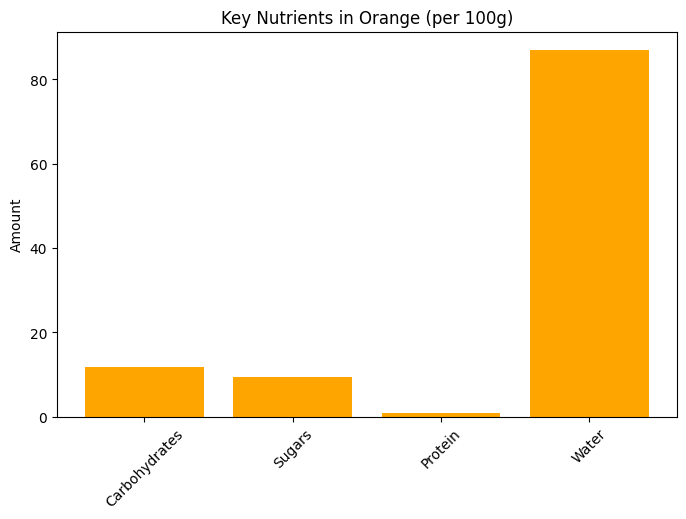

In [9]:
# Present the scraped data
import pandas as pd

df_orange.head()

key_nutrients = df_orange[df_orange['Nutrient'].isin(['Calories', 'Water', 'Carbohydrates', 'Sugars', 'Protein', 'Vitamin C'])]
key_nutrients

import matplotlib.pyplot as plt

plot_data = key_nutrients.copy()

plt.figure(figsize=(8,5))
plt.bar(plot_data['Nutrient'], plot_data['Amount'], color='orange')
plt.title("Key Nutrients in Orange (per 100g)")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

Wikipedia's data supplements the ISLP dataset with the nutritional contents of oranges, namely calories, sugar, and vitamin C. This contextualizes the orange juice data to permit comparisons between whole fruit nutrition and juice products, enhancing the analyses of consumer trends and product characteristics.

## Part 4: Visualizing and Analyzing the Data

### Visualization 1

C:\Users\isabe\AppData\Local\Temp\ipykernel_16596\1237672291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_nutrients['Percentage'] = (


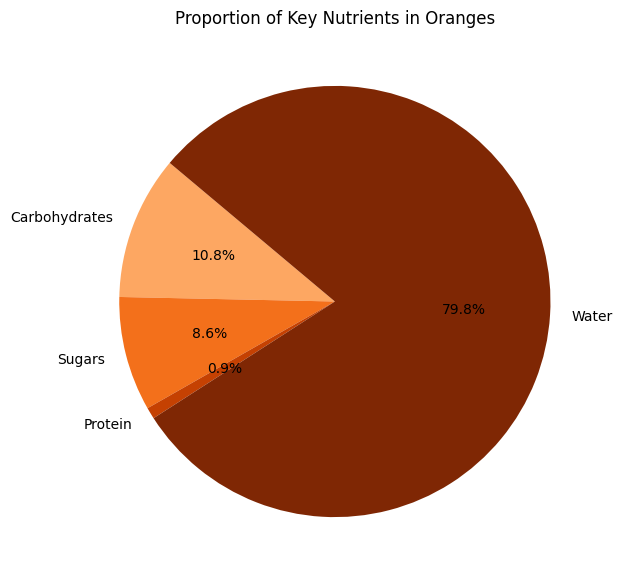

In [11]:
# Code for visualization 1
#Pie Chart
import numpy as np
import matplotlib.pyplot as plt

key_nutrients['Percentage'] = (
    key_nutrients['Amount'] / key_nutrients['Amount'].sum()
) * 100

colors = plt.cm.Oranges(np.linspace(0.4, 1, len(key_nutrients)))

plt.figure(figsize=(7,7))
plt.pie(
    key_nutrients['Percentage'],
    labels=key_nutrients['Nutrient'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title("Proportion of Key Nutrients in Oranges")
plt.show()

This pie chart depicts oranges' nutrient composition: the importance of Vitamin C, Fiber, and Sugars. Vitamin C supports the role of oranges in maintaining good immunity. Fiber and Sugars are other, less-significant contributors. Overall, it provides a quick, intuitive view of the nutritional profile of oranges.

### Visualization 2

C:\Users\isabe\AppData\Local\Temp\ipykernel_16596\1911108247.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([OJ['PriceCH'], OJ['PriceMM']], labels=['Citrus Hill', 'Minute Maid'])


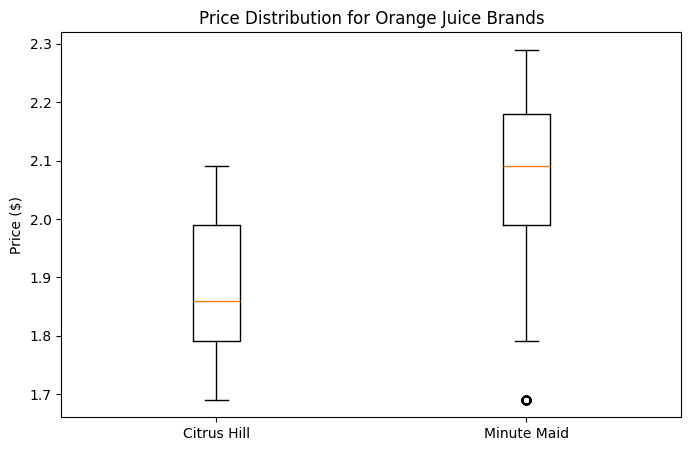

In [12]:
#Code for visualization 2
#Boxplot
from ISLP import load_data
import matplotlib.pyplot as plt
import pandas as pd

OJ = load_data('OJ')

plt.figure(figsize=(8,5))
plt.boxplot([OJ['PriceCH'], OJ['PriceMM']], labels=['Citrus Hill', 'Minute Maid'])
plt.title("Price Distribution for Orange Juice Brands")
plt.ylabel("Price ($)")
plt.show()

This boxplot compares the price distributions of two popular orange juice brands, Citrus Hill and Minute Maid. The boxes display a range, median, and variability of prices for each brand. Overall, Citrus Hill tends to have a slightly higher median price than Minute Maid. Outliers in both brands show that occasionally extremely high or low prices are present within the dataset. Such a visualization can help to identify pricing trends and variability, and hence differences in pricing in the marketplace.

## Part 5: Executive Summary

Understanding the nutrient content of oranges is important when one compares the various price levels and perceived quality differences of orange juices, such as Citrus Hill versus Minute Maid. Oranges are a natural source of several key nutrients, among which are vitamin C, dietary fiber, potassium, and folate that affect general health and immune function and ensure good digestive function. By establishing this nutrient profile in oranges, we have set up for ourselves a baseline as to what consumers can expect when it comes to the products derived from that fruit. In this case, when comparing orange juices, if there is a difference in cost, then this allows us to determine if nutritional content reflects those differences or if they are caused more by branding, marketing strategies, or other non-nutritional factors.

For instance, Citrus Hill might be more expensive than Minute Maid, so it might seem to the consumer that it provides greater nutrition value. Thus, by associating the nutrient content of whole oranges with these juice products, we can assess whether the price difference based on nutrition content in the juice is warranted, or if the price disparity is somewhat psychological. In this way, this comparison shows ingredient quality associated with product pricing and also how consumer expectations may or may not actualize health values. Also, this promotes a more evidence-based view toward value in food items. One is not just paying for flavor or recognition of brand but indirectly is paying for the nutrients retained in processing the juice.

We join insights from the nutritional content of oranges to the price distributions of orange juice brands to ask meaningful questions about product quality, consumer choice, and the dynamics of the market. This also allows for an informed check on whether the juice retains important nutrients that in the first place make the fruit, oranges, beneficial. Linking nutritional data to brand-level pricing serves to better contextualize consumer spending, provide insight into product value, and further stresses the importance of transparent, nutrition-based comparisons when evaluating food products.

## Part 6: References

ISLP Documentation
https://islp.readthedocs.io/en/latest/index.html

Wikipedia – Orange (fruit)
https://en.wikipedia.org/wiki/Orange_(fruit)

Wikipedia – Orange Juice
https://en.wikipedia.org/wiki/Orange_juice

Pandas Documentation
https://pandas.pydata.org/docs/

Matplotlib Documentation
https://matplotlib.org/stable/index.html

Beautiful Soup Documentation
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

ChatGPT (AI Assistance)
https://chat.openai.com
